<a href="https://colab.research.google.com/github/IainDoucette/BME5990Proj1/blob/main/Proj1IainDoucette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
!pip install 'eugene-tools'

In [175]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
%matplotlib inline

In [177]:
# Change this to where you would like to save all your results
import os
os.chdir("/content/drive/MyDrive/EUGENe")  # TODO: change this to your own directory
cwd = os.getcwd()
cwd

'/content/drive/MyDrive/EUGENe'

In [178]:
# Configure EUGENe directories, if you do not set these, EUGENe will use the default directories
from eugene import settings
settings.config_dir = "./proj1_configs"  # Directory to specify when you want to load a model from a config file
settings.dataset_dir = "./proj1_dataset"  # Directory where EUGENe will download datasets to
settings.logging_dir = "./proj1_logs"     # Directory where EUGENe will save Tensorboard training logs and model checkpoints to
settings.output_dir = "./proj1_output"    # Directory where EUGENe will save output files to
settings.figure_dir = "./proj1_figures"    # Directory to specify to EUGENe to save figures to

In [179]:
# Download the dataset to the dataset dir. We are using the promoters assayed in leaf promoters here
import seqdatasets


In [180]:
# Check the dataset
seqdatasets.get_dataset_info()

,n_seqs,n_targets,metadata,url,description,author
dataset_name,,,,,,
random1000,1000,1,10 randomly generated binary labels (label_{0-...,https://github.com/cartercompbio/EUGENe/tree/m...,A randomly generated set of 1000 sequences wit...,Adam Klie (aklie@eng.ucsd.edu)
ray13,241357,244,"probe set (Probe_Set), bidning intensity value...",http://hugheslab.ccbr.utoronto.ca/supplementar...,This dataset represents an in vitro RNA bindin...,Hayden Stites (haydencooperstites@gmail.com)
farley15,163708,2,"barcode (Barcode), RPMs from each biological r...",https://zenodo.org/record/6863861#.YuG15uxKg-Q,This dataset represents SEL-seq data of C. int...,Adam Klie (aklie@eng.ucsd.edu)
deBoer20,100000000+,1,Variable depending on chosen file,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,Gigantic parallel reporter assay data from ~10...,Adam Klie (aklie@eng.ucsd.edu)
jores21,147966,1,"set (set), species (sp), gene promoter came fr...",https://raw.githubusercontent.com/tobjores/Syn...,"This datast includes activity scores for 79,83...",Adam Klie (aklie@eng.ucsd.edu)
deAlmeida22,484052,4,Normalized enrichment scores for developmental...,https://zenodo.org/record/5502060/,This dataset includes UMI-STARR-seq data from ...,Adam Klie (aklie@eng.ucsd.edu)


In [181]:
# Download the dataset to the dataset dir. We are using the promoters assayed in leaf promoters here
sdata = seqdatasets.jores21(dataset="leaf")
sdata

Dataset jores21 CNN_test_leaf.tsv has already been downloaded.
Dataset jores21 CNN_train_leaf.tsv has already been downloaded.
Zarr file found. Opening zarr file.


<xarray.Dataset>
Dimensions:     (_sequence: 72158, _length: 170)
Dimensions without coordinates: _sequence, _length
Data variables:
    enrichment  (_sequence) float64 dask.array<chunksize=(1000,), meta=np.ndarray>
    gene        (_sequence) object dask.array<chunksize=(1000,), meta=np.ndarray>
    seq         (_sequence, _length) |S1 dask.array<chunksize=(1000, 170), meta=np.ndarray>
    set         (_sequence) object dask.array<chunksize=(1000,), meta=np.ndarray>
    sp          (_sequence) object dask.array<chunksize=(1000,), meta=np.ndarray>

In [182]:
from eugene import plot as pl


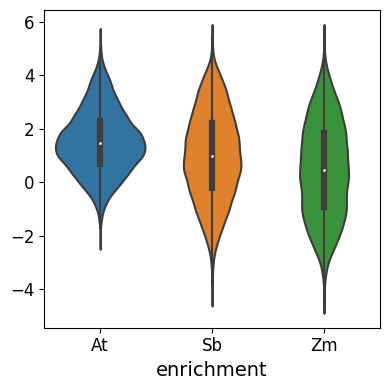

In [183]:
# Plot the distribution of targets across the different species the promoters were derived from
pl.violinplot(sdata, vars=["enrichment"], groupby="sp", figsize=(4, 4))

In [184]:
from eugene import preprocess as pp

In [185]:
# One hot encode all the sequences in the sdata using the wrapper function

pp.ohe_seqs_sdata(sdata, alphabet="DNA")

In [186]:
# Make unique ids for each sequence in the sdata
pp.make_unique_ids_sdata(sdata)

In [187]:
# Split into train and test sets
sdata_train = sdata.sel(_sequence=(sdata["set"] == "train").compute())
sdata_test = sdata.sel(_sequence=(sdata["set"] == "test").compute())

In [188]:
# Split the training set into training and validation
#DEFAULT IS 0.2 right here
pp.train_test_random_split(sdata_train, dim="_sequence", train_var="train_val", test_size=0.2)

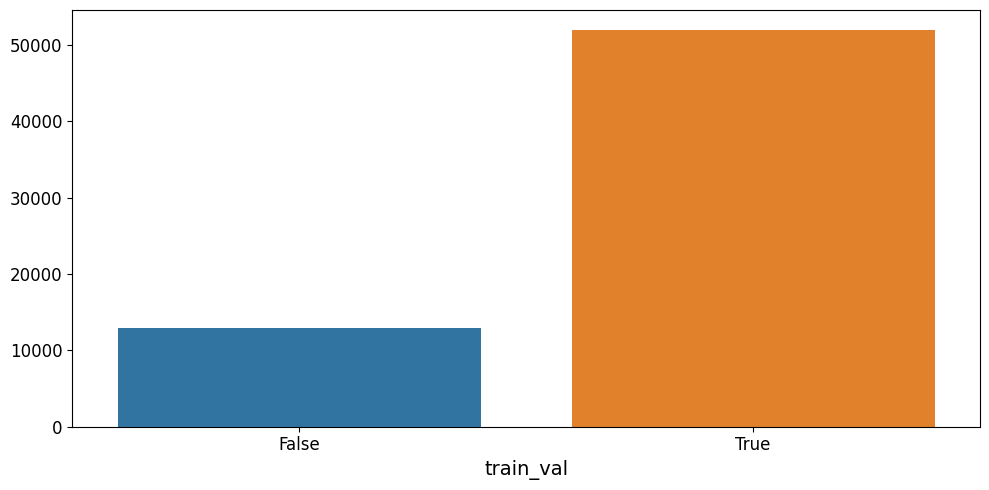

In [189]:
# Check the split with a count plot
pl.countplot(sdata_train, vars="train_val", orient="h")

In [190]:
from eugene import models

In [191]:
# TODO: Uncomment and run the following to get the hybrid config downloaded
!mkdir -p $cwd/proj1_configs
#!wget https://raw.githubusercontent.com/ML4GLand/tutorials/main/configs/hybrid.yaml -O $cwd/tutorial_configs/hybrid.yaml
#!wget https://github.com/ML4GLand/EUGENe_paper/raw/main/configs/jores21/cnn.yaml -O $cwd/tutorial_configs/cnn.yaml
#!wget  https://github.com/IainDoucette/tutorials/blob/patch-1/configs/DoucetteHybrid.yaml -O $cwd/proj1_configs/DoucetteHybrid.yaml
!wget https://raw.githubusercontent.com/IainDoucette/BME5990Proj1/refs/heads/main/DoucetteHybrid.yaml -O $cwd/proj1_configs/DoucetteHybrid.yaml


--2024-10-02 22:12:46--  https://raw.githubusercontent.com/IainDoucette/BME5990Proj1/refs/heads/main/DoucetteHybrid.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 734 [text/plain]
Saving to: ‘/content/drive/MyDrive/EUGENe/proj1_configs/DoucetteHybrid.yaml’

/content/drive/MyDr 100%[===================>]     734  --.-KB/s    in 0s      

2024-10-02 22:12:46 (25.3 MB/s) - ‘/content/drive/MyDrive/EUGENe/proj1_configs/DoucetteHybrid.yaml’ saved [734/734]



In [192]:
#model = models.load_config("hybrid.yaml")
#model = models.load_config("cnn.yaml")
model = models.load_config('DoucetteHybrid.yaml')


In [193]:
# Initialize the weights
models.init_weights(model)

In [194]:
from eugene import train

In [195]:
train.fit_sequence_module(
    model=model,
    sdata=sdata_train,
    seq_var="ohe_seq",
    target_vars=["enrichment"],
    in_memory=True,
    train_var="train_val",
    epochs=25,
    batch_size=128,
    num_workers=4,
    prefetch_factor=2,
    drop_last=False,
    name="DoucetteHybrid",
    version="tutorial_model",
    transforms={"ohe_seq": lambda x: x.swapaxes(1, 2)}
)

Dropping 0 sequences with NaN targets.
Loading ohe_seq and ['enrichment'] into memory


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/drive/MyDrive/EUGENe/proj1_logs/DoucetteHybrid/tutorial_model/checkpoints exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - C

No seed set


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/eugene/plot/_utils.py:321: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_logs = all_logs.append(log, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/eugene/plot/_utils.py:321: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_logs = all_logs.append(log, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/eugene/plot/_utils.py:321: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_logs = all_logs.append(log, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/eugene/plot/_utils.py:321: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_logs = all_logs.append(log, ignore_

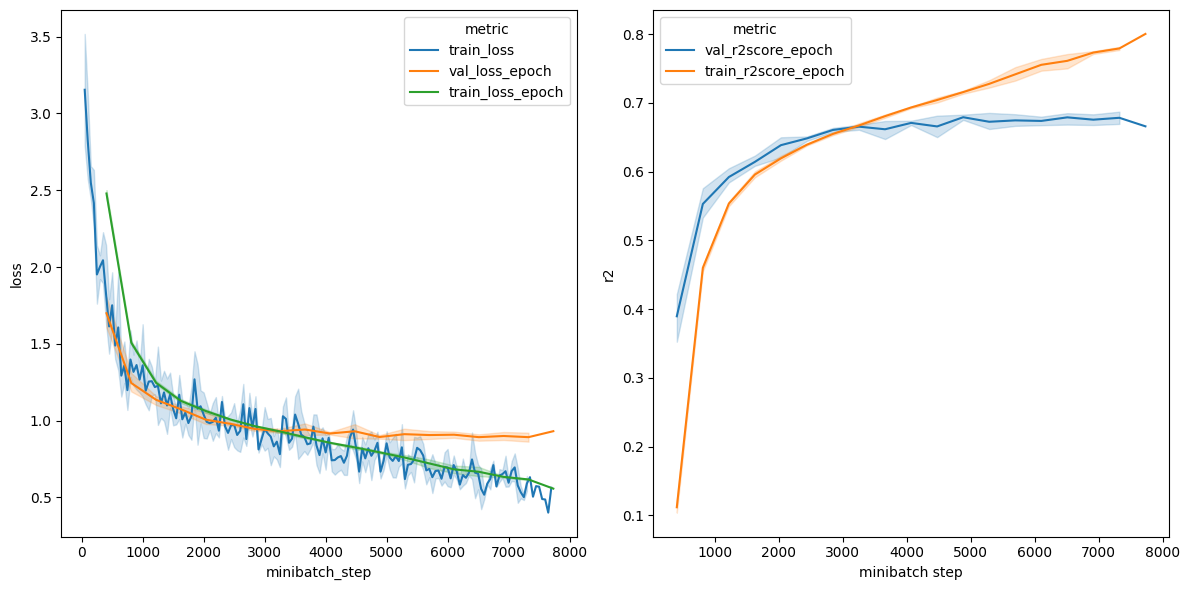

In [197]:
# Plot a loss curve and an r2 curve as a metric
#pl.training_summary(os.path.join(settings.logging_dir, "hybrid", "tutorial_model"), metric="r2")
#pl.training_summary(os.path.join(settings.logging_dir, "cnn", "tutorial_model"), metric="r2")
pl.training_summary(os.path.join(settings.logging_dir, "DoucetteHybrid", "tutorial_model"), metric="r2")

In [198]:
from eugene import evaluate

In [199]:
# We will use the glob Python library to help us find the path to our model
import glob

In [200]:
# We point to the checkpoints directory within the logging directory to grab the best model
'''model_file = glob.glob(os.path.join(settings.logging_dir, "cnn", "tutorial_model", "checkpoints", "*"))[0]
best_model = models.SequenceModule.load_from_checkpoint(model_file, arch=model.arch)'''

model_file = glob.glob(os.path.join(settings.logging_dir, "DoucetteHybrid", "tutorial_model", "checkpoints", "*"))[0]
best_model = models.SequenceModule.load_from_checkpoint(model_file, arch=model.arch)

In [201]:
# Use this best model to predict on the held-out data. This will store predictions in
evaluate.predictions_sequence_module(
    best_model,
    sdata=sdata_test,
    seq_var="ohe_seq",
    target_vars="enrichment",
    batch_size=2048,
    in_memory=True,
    name="DoucetteHybrid",
    version="tutorial_model",
    file_label="test",
    prefix=f"tutorial_model_",
    transforms={"ohe_seq": lambda x: x.swapaxes(1, 2)}
)

Loading ohe_seq and ['enrichment'] into memory


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Dropping 0 sequences with NaN targets.
Group R2 MSE Pearsonr Spearmanr
At 0.5020547328206572 0.6935557508151379 0.692655613602253
Sb 0.6496108058521644 0.9513129349950219 0.8248081385432005
Zm 0.719287455643248 0.854726642988726 0.8491806397387018


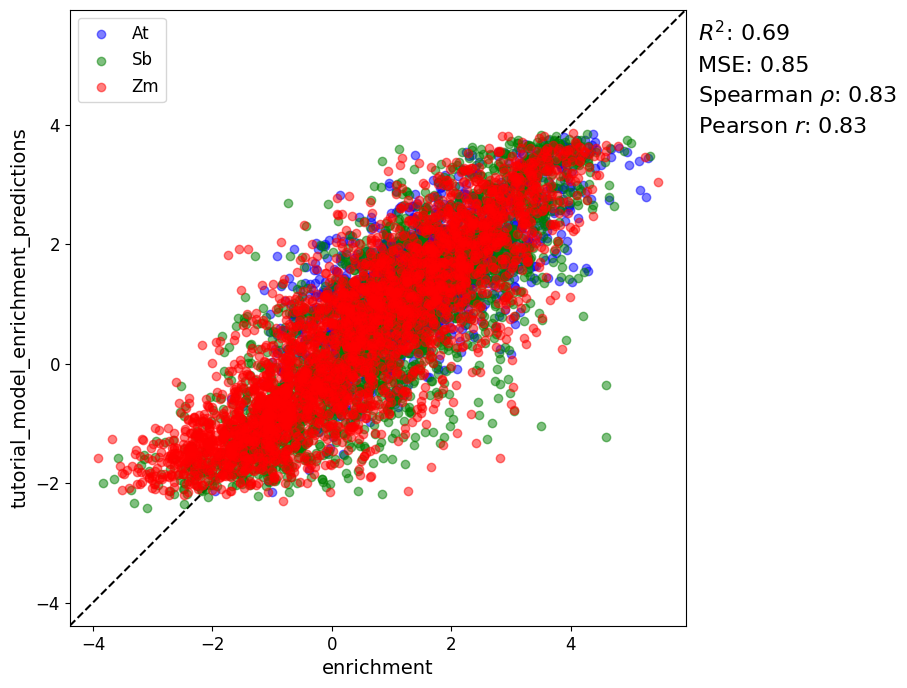

In [202]:
pl.performance_scatter(
    sdata_test,
    target_vars="enrichment",
    prediction_vars="tutorial_model_enrichment_predictions",
    alpha=0.5,
    groupby="sp",
    figsize=(8, 8)
)

In [203]:
from eugene import interpret

In [204]:
interpret.generate_pfms_sdata(
    best_model,
    sdata_test,
    seq_var="ohe_seq",
    layer_name="arch.conv1d_tower.layers.1",
    kernel_size=13,
    num_filters=256,
    num_seqlets=100,
    transforms={"ohe_seq": lambda x: x.swapaxes(1, 2)}
)

Getting activations on batches of size 128:   0%|          | 0/56 [00:00<?, ?it/s]

Getting filter activators for 256 filters:   0%|          | 0/256 [00:00<?, ?it/s]

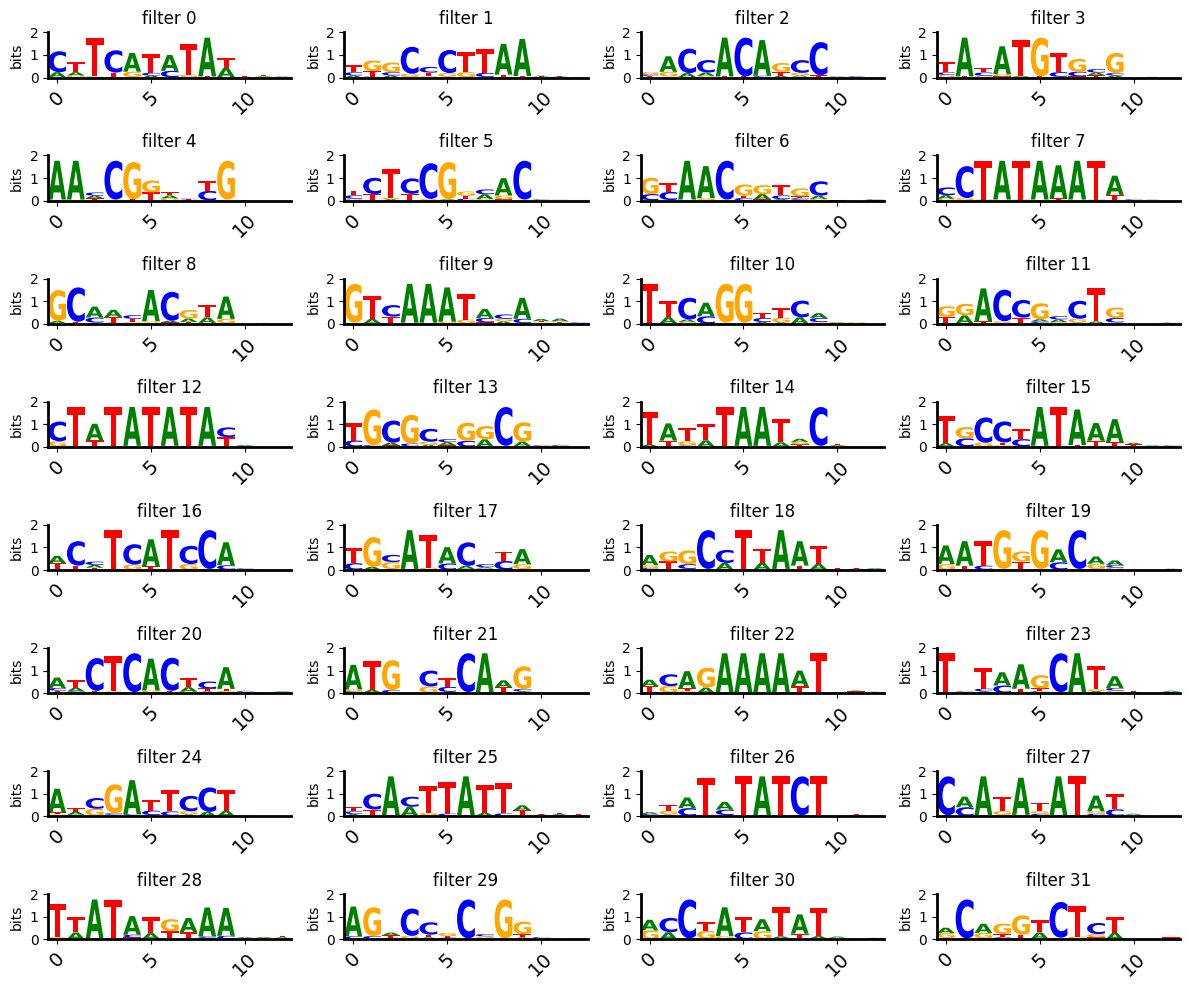

In [205]:
# We can visualize these PFMs as PWM logos
pl.multifilter_viz(
    sdata_test,
    filter_nums=range(0, 32),
    pfms_var="arch.conv1d_tower.layers.1_pfms",
    num_rows=8,
    num_cols=4,
    titles=[f"filter {i}" for i in range(0, 32)],
)

In [206]:
interpret.filters_to_meme_sdata(
    sdata_test,
    filters_var="arch.conv1d_tower.layers.1_pfms",
    axis_order=("_arch.conv1d_tower.layers.1_256_filters", "_ohe", "_arch.conv1d_tower.layers.1_13_kernel_size"),
    output_dir=os.path.join(settings.output_dir),
    filename="tutorial_model_best_model_filters.meme"
)

Output directory already exists: /content/drive/MyDrive/EUGENe/proj1_output
Saved pfm in MEME format as: /content/drive/MyDrive/EUGENe/proj1_output/tutorial_model_best_model_filters.meme


In [207]:
interpret.attribute_sdata(
    best_model,
    sdata_test,
    method="DeepLift",
    batch_size=128,
    reference_type="zero",
    transforms={"ohe_seq": lambda x: x.swapaxes(1, 2)}
)

Computing saliency on batches of size 128:   0%|          | 0/56 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/seqexplainer/attributions/_attributions.py:119: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs_ = torch.tensor(inputs_, dtype=torch.float32).requires_grad_(True).to(device)
/usr/local/lib/python3.10/dist-packages/captum/attr/_core/deep_lift.py:336: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/captum/attr/_core/deep_lift.py:467: UserWarning: An invalid module MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False) is detected. Saved gradients will
                be used as the gradients of the module's input tensor.
                See MaxPool1d as an example.
  warnings.warn

Importance values:   0%|          | 0/1 [00:00<?, ?it/s]

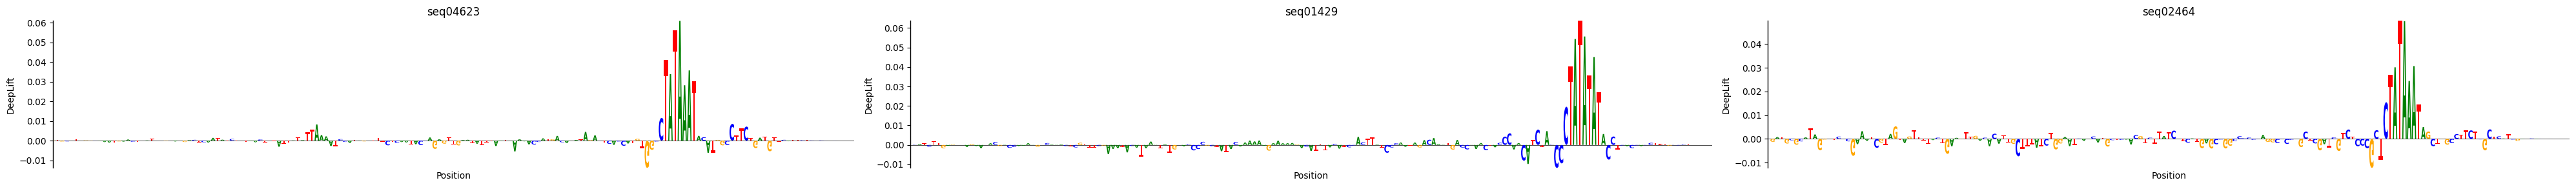

In [208]:
# Grab the top3 in terms of predictions to plot tracks for
top3 = sdata_test["tutorial_model_enrichment_predictions"].to_series().sort_values(ascending=False).iloc[:3].index
ids = sdata_test["id"].values[top3]
pl.multiseq_track(
    sdata_test,
    seq_ids=ids,
    attrs_vars = "DeepLift_attrs",
    ylabs="DeepLift",
    height=3,
    width=40,
)

In [209]:
# Import the packages
import seqpro as sp
import xarray as xr

In [210]:
# Create an SeqData object so its compatible with the function
random_ohe_seq = sp.ohe(sp.random_seqs((5, 170), sp.alphabets.DNA), sp.alphabets.DNA).swapaxes(1, 2)
sdata_random = xr.Dataset({"ohe_seq": (("_sequence", "_ohe", "length"), random_ohe_seq)})
pp.make_unique_ids_sdata(sdata_random, id_var="name")

In [211]:
# Let's get our background predictions
sdata_random["background_predictions"] = best_model.predict(sdata_random["ohe_seq"].values).squeeze()

Predicting on batches: 0it [00:00, ?it/s]

In [212]:
import motifdata as md

In [213]:
# TODO: The motif can be downlaoded from https://github.com/tobjores/Synthetic-Promoter-Designs-Enabled-by-a-Comprehensive-Analysis-of-Plant-Core-Promoters/blob/main/data/misc
!wget https://raw.githubusercontent.com/tobjores/Synthetic-Promoter-Designs-Enabled-by-a-Comprehensive-Analysis-of-Plant-Core-Promoters/main/data/misc/CPEs.meme -O $cwd/tutorial_dataset/CPEs.meme

--2024-10-02 22:18:39--  https://raw.githubusercontent.com/tobjores/Synthetic-Promoter-Designs-Enabled-by-a-Comprehensive-Analysis-of-Plant-Core-Promoters/main/data/misc/CPEs.meme
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2913 (2.8K) [text/plain]
Saving to: ‘/content/drive/MyDrive/EUGENe/tutorial_dataset/CPEs.meme’

/content/drive/MyDr 100%[===================>]   2.84K  --.-KB/s    in 0s      

2024-10-02 22:18:39 (9.66 MB/s) - ‘/content/drive/MyDrive/EUGENe/tutorial_dataset/CPEs.meme’ saved [2913/2913]



In [217]:
# We can load it and pull out the PFM and other info about the motif
meme = md.read_meme(os.path.join(settings.dataset_dir, "CPEs.meme"))
motif = meme.motifs["TATA"]
feat_name = motif.name
pfm = motif.pfm
consensus = motif.consensus
consensus_ohe = sp.ohe(consensus, alphabet=sp.alphabets.DNA)
feat_name, pfm, consensus

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/EUGENe/proj1_dataset/CPEs.meme'

In [218]:
# This is the EUGENe function that does exactly that!
interpret.positional_gia_sdata(
    model=best_model,
    sdata=sdata_random,
    feature=consensus_ohe,
    id_var="name",
    store_var=f"slide_{feat_name}",
    encoding="onehot"
)

NameError: name 'consensus_ohe' is not defined

In [219]:
#broken :(

ax = pl.positional_gia_plot(sdata_random, vars=[f"slide_{feat_name}"], id_var="name", return_axes=True)
ax.hlines(sdata_random["background_predictions"].mean(), 0, 170, linestyle="--", color="red")

NameError: name 'feat_name' is not defined

In [220]:
# Evolve this sequence for ten rounds
interpret.evolve_seqs_sdata(model=best_model, sdata=sdata_random, rounds=10)

Evolving seqs:   0%|          | 0/5 [00:00<?, ?it/s]

In [221]:
# Get all the vars that start with "evolved"
evolved_vars = ["original_score"] + [var for var in sdata_random.data_vars if var.startswith("evolved") and var.endswith("score")]

In [ ]:
# Check the predicted value at each round of evolution
sdata_random[evolved_vars].to_dataframe()